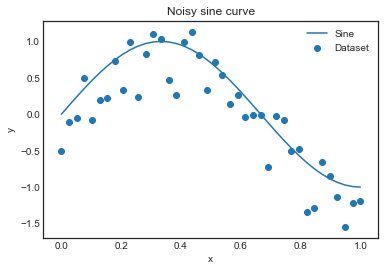

[[-0.08378988]
 [-0.29575945]]


In [29]:
import numpy as np
from matplotlib import pyplot as plt

def costfunction(X,y,theta):
    '''Cost function for linear regression'''
    #Initialization of useful values 
    m = np.size(y)
    
    #Vectorized implementation
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def costFunctionReg(X,y,theta,lamda = 10):
    '''Cost function for ridge regression (regularized L2)'''
    #Initialization
    m = len(y) 
    J = 0
    
    #Vectorized implementation
    h = X @ theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    return(J) 


def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    '''Gradient descent for linear regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards
    
    for i in range(num_iters):
        #Cost and intermediate values for each iteration
        J_history[i] = costfunction(X,y,theta)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])
        
        #Grad function in vectorized form
        h = X @ theta
        gradient = (1/m)*(X.T @ (h-y))
        theta = theta - alpha * gradient       
    return theta,J_history, theta_0_hist, theta_1_hist

def gradient_descent_reg(X,y,theta,alpha = 0.0005,lamda = 10,num_iters=1000):
    '''Gradient descent for ridge regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #Used for three D plot

    for i in range(num_iters):
        #Hypothesis function
        h = np.dot(X,theta)
        
        #Grad function in vectorized form
        theta = theta - alpha * (1/m)* (  (X.T @ (h-y)) + lamda * theta )
           
        #Cost function in vectorized form       
        J_history[i] = costFunctionReg(X,y,theta,lamda)
           
        #Calculate the cost for each iteration(used to plot convergence)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])   
    return theta ,J_history, theta_0_hist, theta_1_hist

def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.inv(X.T @ X) @ X.T @ y
    
def closed_form_reg_solution(X,y,lamda = 10): 
    '''Closed form solution for ridge regression'''
    m,n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:,0]

def cost_l2(x,y):
    return x**2 + y**2

def cost_l1(x,y):
    return np.abs(x) + np.abs(y)

#Generating sine curve and uniform noise
np.random.seed(22)

x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Centering the y data
y_noise = y_noise - y_noise.mean()

#Design matrix is x, x^2
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
# X = X / np.linalg.norm(X,axis = 0)

#Plotting the result
plt.scatter(x,y_noise, label = 'Dataset')
plt.plot(x,y,label = 'Sine')
plt.title('Noisy sine curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# # height (cm)
# X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# # weight (kg)
# y = np.array([49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

# # Building Xbar 
# one = np.ones((X.shape[0], 1))
# Xbar = np.concatenate((one, X), axis = 1)
              
# #Computing the gradient descent
theta_result_reg,J_history_reg, theta_0, theta_1 = gradient_descent_reg(X,y_noise,np.array([7.,10.]).reshape(-1,1), 0.8,10,num_iters=5000)
print(theta_result_reg)
    